<!DOCTYPE html>
<html>

</head>
<body>
    <h1><span style="color: blue; font-weight: bold;">Stock Price Prediction</span> <span style="color: red; font-weight: bold;">using stacked LSTM</span></h1>
    <p>Stock price prediction is a crucial task in financial analysis. This project utilizes stacked LSTM (Long Short-Term Memory) neural networks to forecast future stock prices.</p>
    <p>By leveraging deep learning techniques, we aim to make accurate predictions that can assist investors and traders in making informed decisions.</p>
</body>
</html>


importing the library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

readung the data

In [ ]:
df=pd.read_csv('/content/NSE-TATAGLOBAL.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


EDA

In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    2035
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df.sort_values(by='Date')

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


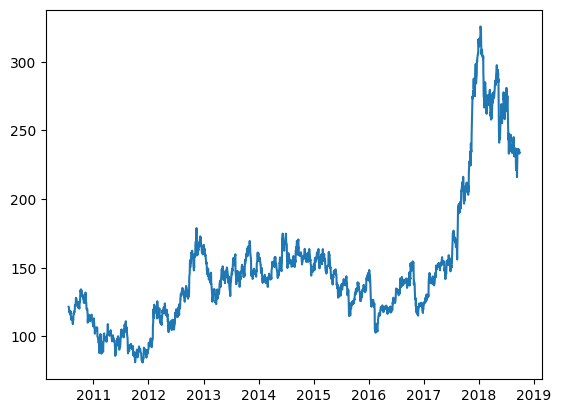

In [ ]:
plt.plot(df['Close'])

In [ ]:
close_df = df['Close'].values.reshape(-1, 1)
close_df

array([[233.75],
       [233.25],
       [234.25],
       ...,
       [120.65],
       [120.9 ],
       [121.55]])

Feature Scaling


as LSTM is sensitive to the scale of the data

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_df = scaler.fit_transform(close_df)

In [ ]:
scaled_df

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

Splitting the data

In [ ]:
numbers=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
seq_len = 3
f= []
j = []
for i in range(seq_len, len(numbers)):
  f.append([numbers[i - 3], numbers[i - 2], numbers[i - 1]])
  j.append(numbers[i])
f,j = np.array(f), np.array(j)


In [ ]:
f = f.reshape(f.shape[0], f.shape[1], 1)

In [ ]:
print("the value of F:",f),print("the value of J:",j)

the value of F: [[[1]
  [2]
  [3]]

 [[2]
  [3]
  [4]]

 [[3]
  [4]
  [5]]

 [[4]
  [5]
  [6]]

 [[5]
  [6]
  [7]]

 [[6]
  [7]
  [8]]

 [[7]
  [8]
  [9]]]
the value of J: [ 4  5  6  7  8  9 10]


(None, None)

In [ ]:
sequence_length = 7

X = []
y = []

for i in range(sequence_length, len(scaled_df)):
    X.append(scaled_df[i - sequence_length:i])
    y.append(scaled_df[i])

X, y = np.array(X), np.array(y)

# Reshape the data for LSTM input (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
split_ratio = 0.8  # 80% for training, 20% for testing

split_index = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]


In [ ]:
y_train.shape

(1622, 1)

In [ ]:
model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer (stacked)
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer (stacked)
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 7, 50)             10400     
                                                                 
 dropout_12 (Dropout)        (None, 7, 50)             0         
                                                                 
 lstm_13 (LSTM)              (None, 7, 50)             20200     
                                                                 
 dropout_13 (Dropout)        (None, 7, 50)             0         
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_14 (Dropout)        (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
51/51 [==============================] - 6s 7ms/step - loss: 0.0209
Epoch 2/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 3/100
51/51 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 4/100
51/51 [==============================] - 0s 10ms/step - loss: 0.0021
Epoch 5/100
51/51 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 6/100
51/51 [==============================] - 1s 10ms/step - loss: 0.0020
Epoch 7/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 8/100
51/51 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 9/100
51/51 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 10/100
51/51 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 11/100
51/51 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 12/100
51/51 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 13/100
51/51 [===============

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


13/13 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predicted_stock_price)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 2.7501046652110426


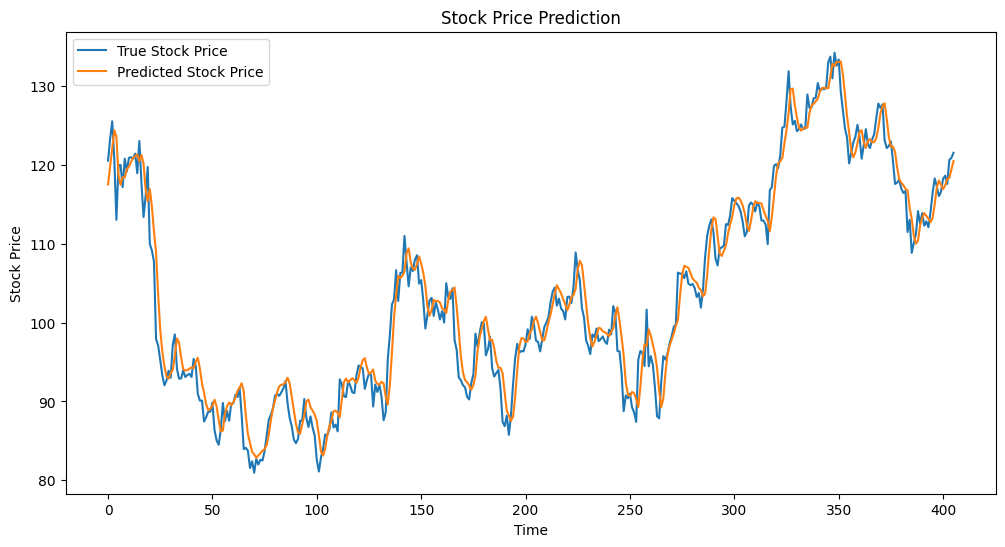

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Stock Price')
plt.plot(predicted_stock_price, label='Predicted Stock Price')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()
